# THE SPARKS FOUNDATION - DATA SCIENCE AND BUSINESS ANALYTICS 


# Done by- Prajakta Bharade


# TASK 2- Prediction Using UnSupervised Machine Learning



# Step 1- Import Libraries


In [1]:
#Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Loading the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Step 2 - To find the optimum number of clusters for kmeans and to determine the value of k



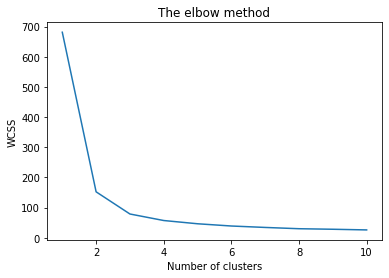

In [2]:
# Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

we can clearly see why it is called the elbow method from the graph as the optimum clusters is where the elbow occurs. This is when the Within Cluster Sum Of Squares (WCSS) doesn't decrease significantly with every iteration

From this we choose the number of clusters as '3'

# Step 3 - Applying kmeans to dataset/creating the kmeans classifier

In [4]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',               
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Step 4 -Visualising the clusters



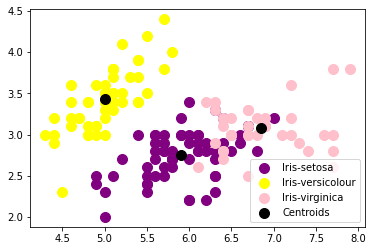

In [5]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'pink', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

Here the three clusters formed represents the type of Iris flowers.